In [3]:
# Load the breast cancer dataset using sklearn.datasets.load_breast_
# cancer(). As usual, split the data into test and training set.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
# Read up about the Area Under the Curve of the Reciever Operating 
# Characteristic Curve, the so-called ROC-AUC-metric, i.e. at 
# towardsdatascience.com.

In [12]:
# Learn a a Neural Network after MinMax-Scaling with in total four 
# parameter combinations (and 1000 iterations) of your choice using 
# 5-fold Cross-Validation. Use the ROC-AuC-score metric to pick the best 
# model.

from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("scalar", MinMaxScaler()),
                 ("nn",MLPClassifier(max_iter=1000, solver="lbfgs"))])
param_grid = {"nn__hidden_layer_sizes": [(200,),(100,)],"nn__alpha": 
              [0.00001, 0.001]} 

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)


print(grid.best_score_)
print(grid.best_params_)

preds = grid.predict(X_test)
print(preds)

0.9647887323943662
{'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (100,)}
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1
 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0]


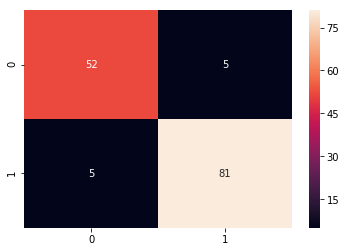

In [13]:
# Plot a heatmap for the mean test scores of your pipeline and label the 
# axes ticks using your used values.

from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test,preds)
sns.heatmap(confusion_m,annot=True)

In [24]:
# Plot a heatmap of the confusion matrix for the best model (Hint: 
# the best estimator has a property _final_estimator).

print(grid.best_params_)
print(grid.best_score_)

best = grid.best_estimator_
best._final_estimator

{'nn__alpha': 0.001, 'nn__hidden_layer_sizes': (100,)}
0.9647887323943662


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)